In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime as dt
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
import pandas as pd
import matplotlib.dates as mpl_dates
import scipy.stats as stats
from matplotlib.ticker import StrMethodFormatter 

### Import data

In [9]:
#Import Rosario data
#Prtoadm
prtoadm_ros_df = pd.read_csv('combined2timeseries/PRtoadm_ros_avg.csv')
datelist_prtoadm_ros = pd.to_datetime(prtoadm_ros_df['Date'])
prtoadm_ros = pd.DataFrame({'Transport':prtoadm_ros_df['Transport'].values},index=datelist_prtoadm_ros)['Transport']

#Gulftoadm
gulftoadm_ros_df = pd.read_csv('combined2timeseries/Gulftoadm_ros_avg.csv')
datelist_gulftoadm_ros = pd.to_datetime(gulftoadm_ros_df['Date'])
gulftoadm_ros = pd.DataFrame({'Transport':gulftoadm_ros_df['Transport'].values},index=datelist_gulftoadm_ros)['Transport']

#Gulftovs
gulftovs_ros_df = pd.read_csv('combined2timeseries/Gulftovs_ros_avg.csv')
datelist_gulftovs_ros = pd.to_datetime(gulftovs_ros_df['Date'])
gulftovs_ros = pd.DataFrame({'Transport':gulftovs_ros_df['Transport'].values},index=datelist_gulftovs_ros)['Transport']

#PRtovs
prtovs_ros_df = pd.read_csv('combined2timeseries/PRtovs_ros_avg.csv')
datelist_prtovs_ros = pd.to_datetime(prtovs_ros_df['Date'])
prtovs_ros = pd.DataFrame({'Transport':prtovs_ros_df['Transport'].values},index=datelist_prtovs_ros)['Transport']

#Import Haro data
#Prtoadm
prtoadm_haro_df = pd.read_csv('combined2timeseries/PRtoadm_haro_avg.csv')
datelist_prtoadm_haro = pd.to_datetime(prtoadm_haro_df['Date'])
prtoadm_haro = pd.DataFrame({'Transport':prtoadm_haro_df['Transport'].values},index=datelist_prtoadm_haro)['Transport']

#Gulftoadm
gulftoadm_haro_df = pd.read_csv('combined2timeseries/Gulftoadm_haro_avg.csv')
datelist_gulftoadm_haro = pd.to_datetime(gulftoadm_haro_df['Date'])
gulftoadm_haro = pd.DataFrame({'Transport':gulftoadm_haro_df['Transport'].values},index=datelist_gulftoadm_haro)['Transport']

#Gulftovs
gulftovs_haro_df = pd.read_csv('combined2timeseries/Gulftovs_haro_avg.csv')
datelist_gulftovs_haro = pd.to_datetime(gulftovs_haro_df['Date'])
gulftovs_haro = pd.DataFrame({'Transport':gulftovs_haro_df['Transport'].values},index=datelist_gulftovs_haro)['Transport']

#PRtovs
prtovs_haro_df = pd.read_csv('combined2timeseries/PRtovs_haro_avg.csv')
datelist_prtovs_haro = pd.to_datetime(prtovs_haro_df['Date'])
prtovs_haro = pd.DataFrame({'Transport':prtovs_haro_df['Transport'].values},index=datelist_prtovs_haro)['Transport']

#Import SJC data
#Prtoadm
prtoadm_sjc_df = pd.read_csv('combined2timeseries/PRtoadm_sjc_avg.csv')
datelist_prtoadm_sjc = pd.to_datetime(prtoadm_sjc_df['Date'])
prtoadm_sjc = pd.DataFrame({'Transport':prtoadm_sjc_df['Transport'].values},index=datelist_prtoadm_sjc)['Transport']

#Gulftoadm
gulftoadm_sjc_df = pd.read_csv('combined2timeseries/Gulftoadm_sjc_avg.csv')
datelist_gulftoadm_sjc = pd.to_datetime(gulftoadm_sjc_df['Date'])
gulftoadm_sjc = pd.DataFrame({'Transport':gulftoadm_sjc_df['Transport'].values},index=datelist_gulftoadm_sjc)['Transport']

#Gulftovs
gulftovs_sjc_df = pd.read_csv('combined2timeseries/Gulftovs_sjc_avg.csv')
datelist_gulftovs_sjc = pd.to_datetime(gulftovs_sjc_df['Date'])
gulftovs_sjc = pd.DataFrame({'Transport':gulftovs_sjc_df['Transport'].values},index=datelist_gulftovs_sjc)['Transport']

#PRtovs
prtovs_sjc_df = pd.read_csv('combined2timeseries/PRtovs_sjc_avg.csv')
datelist_prtovs_sjc = pd.to_datetime(prtovs_sjc_df['Date'])
prtovs_sjc = pd.DataFrame({'Transport':prtovs_sjc_df['Transport'].values},index=datelist_prtovs_sjc)['Transport']

##North
#Haro

#Admtopr
admtopr_haro_df = pd.read_csv('combined2timeseries/admtopr_haro.csv')
datelist_admtopr_haro = pd.to_datetime(admtopr_haro_df['Date'])
admtopr_haro = pd.DataFrame({'Transport':admtopr_haro_df['Transport'].values},index=datelist_admtopr_haro)['Transport']

#Admtopr - Rosario
admtopr_ros_df = pd.read_csv('combined2timeseries/admtopr_ros.csv')
datelist_admtopr_ros = pd.to_datetime(admtopr_ros_df['Date'])
admtopr_ros = pd.DataFrame({'Transport':admtopr_ros_df['Transport'].values},index=datelist_admtopr_ros)['Transport']

### Haro Components

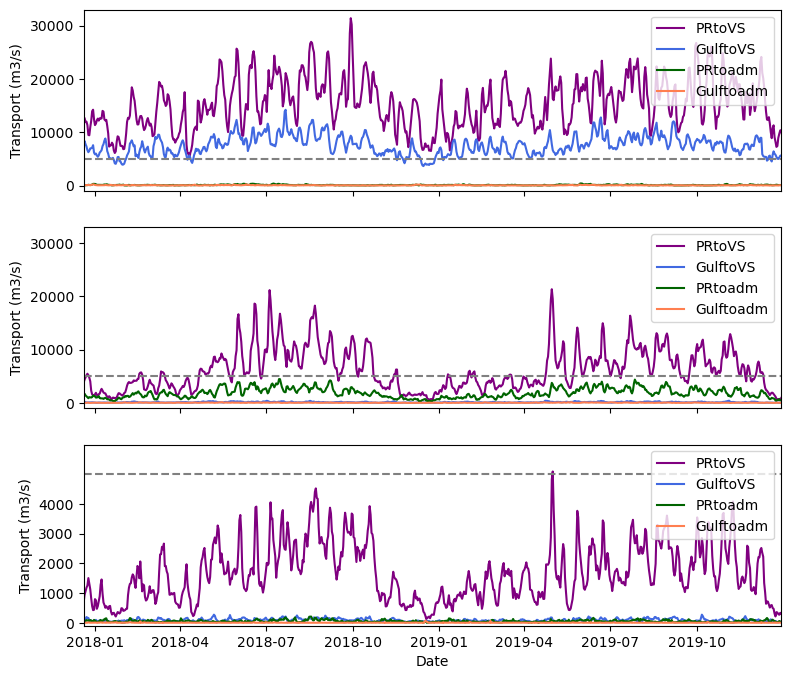

In [16]:
fig,[ax,ax2,ax3] = plt.subplots(3,1,figsize=(9,8),sharex=True)

ax.plot(prtovs_haro,color='purple',label='PRtoVS')
ax.plot(gulftovs_haro,color='royalblue',label='GulftoVS')
ax.plot(prtoadm_haro,color='darkgreen',label='PRtoadm')
ax.plot(gulftoadm_haro,color='coral',label='Gulftoadm')
ax.axhline(y=5000,color='grey',ls='--')
ax.set_xlim([datelist_gulftoadm_haro.iloc[0],datelist_gulftoadm_haro.iloc[-1]])
ax.set_ylim([-1000,33000])
ax.set_yticks(np.arange(0,31000,10000))
ax.set_ylabel('Transport (m3/s)')
ax.legend(loc=1)

ax2.plot(prtovs_ros,color='purple',label='PRtoVS')
ax2.plot(gulftovs_ros,color='royalblue',label='GulftoVS')
ax2.plot(prtoadm_ros,color='darkgreen',label='PRtoadm')
ax2.plot(gulftoadm_ros,color='coral',label='Gulftoadm')
ax2.set_ylim([-1000,33000])
ax2.set_yticks(np.arange(0,31000,10000))
ax2.axhline(y=5000,color='grey',ls='--')
ax2.set_ylabel('Transport (m3/s)')
ax2.legend()

ax3.plot(prtovs_sjc,color='purple',label='PRtoVS')
ax3.plot(gulftovs_sjc,color='royalblue',label='GulftoVS')
ax3.plot(prtoadm_sjc,color='darkgreen',label='PRtoadm')
ax3.plot(gulftoadm_sjc,color='coral',label='Gulftoadm')
ax3.set_ylim([-100,6000])
ax3.set_yticks(np.arange(0,5000,1000))
ax3.axhline(y=5000,color='grey',ls='--')
ax3.set_xlabel('Date')
ax3.set_ylabel('Transport (m3/s)')
ax3.legend(loc=1)

In [17]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/south_comps_supp.png',bbox_inches='tight')

In caption: Grey line @ 5000 to emphasize the yaxis difference.

### Exchange b/w SoG and admiralty

In [11]:
ros_to_adm = prtoadm_ros + gulftoadm_ros
haro_to_adm = prtoadm_haro + gulftoadm_haro
sjc_to_adm = prtoadm_sjc + gulftoadm_sjc

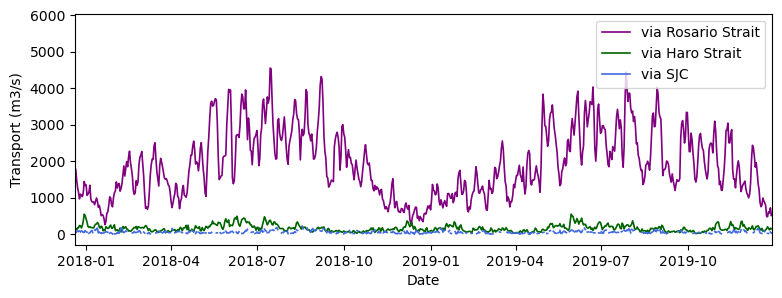

In [12]:
fig,ax = plt.subplots(figsize=(9,3))

ax.plot(ros_to_adm,color='purple',lw=1.2,label='via Rosario Strait')
ax.plot(haro_to_adm,color='darkgreen',lw=1.2,label='via Haro Strait')
ax.plot(sjc_to_adm,color='royalblue',lw=1.2,label='via SJC')
ax.set_xlim([datelist_gulftoadm_haro[0],datelist_gulftoadm_haro.iloc[-1]])
ax.set_xlabel('Date')
ax.set_ylabel('Transport (m3/s)')
ax.legend(loc=1)

In [6]:
np.mean(ros_to_adm)

1946.7204957040074

### Plot north

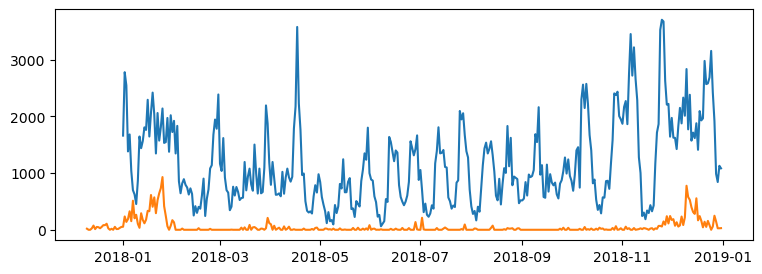

In [7]:
fig,ax = plt.subplots(figsize=(9,3))

ax.plot(admtopr_haro)
ax.plot(admtopr_ros)

In [8]:
np.mean(admtopr_haro)

1165.348295771255

Southward exchange with admiralty is primarily through Rosario Strait. Northward exchange via Haro Strait. More southward exchange than northward